In [1]:
import xml.etree.ElementTree as ET
from pylab import *
import networkx as nx
import matplotlib.pyplot as plt

# Parsing the osm file using iterparse

In [2]:
%%time
node = {} # {'node_ID1' : [x1,y1], 'node_ID2' : [x2,y2],.... }
way = {} # {'way_ID1' : [nodes 1], 'way_ID2' : [nodes 2],.... }
G = [] # a list of edges - [(node1,node2,dist12),(node3,node4,dist34), ...]
R = 6378000 # Radius of earth

for event, elem in ET.iterparse('map_bangalore'):
    if elem.tag == "node":
        ID = elem.get('id')
        lat = float(elem.get('lat'))*pi/180
        lon = float(elem.get('lon'))*pi/180
        x = R*cos(lat)*cos(lon)
        y = R*cos(lat)*sin(lon)
        node[ID] = [x,y]
        elem.clear()
    if elem.tag == "way":
        path = []
        ID = elem.get('id')
        for nd in elem:
            if nd.tag == "nd":
                path.append(nd.get('ref'))
        way[ID] = path
        for i in range(len(path)-1):
            [x1,y1] = node[path[i]]
            [x2,y2] = node[path[i+1]]
            dst = sqrt((x2-x1)**2 + (y2-y1)**2)
            G.append((path[i],path[i+1],dst)) # a list of tuples
        elem.clear()
        
print(len(G)) 
G[1]


1840778
Wall time: 33.1 s


('431610691', '431610692', 181.5585927774593)

In [3]:
print("No of nodes - " , len(node))
print("No of edges - " , len(G))

No of nodes -  1825940
No of edges -  1840778


In [4]:
M = nx.Graph()
M.add_weighted_edges_from(G)

# Scatter plot

In [4]:
X = []
Y= []
for i in node:
    X.append(node[i][0])
    Y.append(node[i][1])

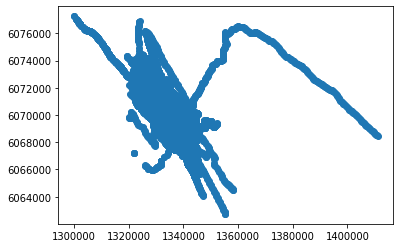

In [9]:
plt.scatter(X,Y)

In [11]:
with open("X.txt","w") as f:
    for i in X:
        f.write('%s\n' % str(i))
with open("Y.txt","w") as f:
    for i in Y:
        f.write('%s\n' % str(i))
    

In [12]:
len(X),len(Y)

(1825940, 1825940)

# If we want G as a dictionary (not needed though)

In [52]:
node = {} # {'node_ID1' : [x1,y1], 'node_ID2' : [x2,y2],.... }
way = {} # {'way_ID1' : [nodes 1], 'way_ID2' : [nodes 2],.... }
G = {} # a dictionary with 'nodes' as keys 'edges with distances' as values
R = 6378000 # Radius of earth

for event, elem in ET.iterparse('map_sample.osm'):
    if elem.tag == "node":
        ID = elem.get('id')
        lat = float(elem.get('lat'))*pi/180
        lon = float(elem.get('lon'))*pi/180
        x = R*cos(lat)*cos(lon)
        y = R*cos(lat)*sin(lon)
        node[ID] = [x,y]
        elem.clear()
    if elem.tag == "way":
        path = []
        ID = elem.get('id')
        for nd in elem:
            if nd.tag == "nd":
                path.append(nd.get('ref'))
        way[ID] = path
        for i in range(len(path)-1):
            [x1,y1] = node[path[i]]
            [x2,y2] = node[path[i+1]]
            dst = sqrt((x2-x1)**2 + (y2-y1)**2)
            if(path[i] not in G):
                G[path[i]] = []
            if(path[i+1] not in G):
                G[path[i+1]] = []
            G[path[i]].append([path[i+1],dst])   
            #G[path[k+1]].append([path[k],dst])
        elem.clear()
        
#print(len(G.keys()))  
#print(len(way.keys()))
#for i in sorted (G) : 
#    print ((i, G[i]))